In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [4]:
bike_data_raw = pd.read_csv('daily-bike-share.csv')
bike_data_raw

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1    1/1/2011       1   0     1        0        6           0   
1          2    1/2/2011       1   0     1        0        0           0   
2          3    1/3/2011       1   0     1        0        1           1   
3          4    1/4/2011       1   0     1        0        2           1   
4          5    1/5/2011       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
726      727  12/27/2012       1   1    12        0        4           1   
727      728  12/28/2012       1   1    12        0        5           1   
728      729  12/29/2012       1   1    12        0        6           0   
729      730  12/30/2012       1   1    12        0        0           0   
730      731  12/31/2012       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  rentals  
0             2  0.344167  0.363625  0.805833   0.160446      331  
1             2  0.363478  0.353739  0.696087   0.248539      131  
2             1  0.196364  0.189405  0.437273   0.248309      120  
3             1  0.200000  0.212122  0.590435   0.160296      108  
4             1  0.226957  0.229270  0.436957   0.186900       82  
..          ...       ...       ...       ...        ...      ...  
726           2  0.254167  0.226642  0.652917   0.350133      247  
727           2  0.253333  0.255046  0.590000   0.155471      644  
728           2  0.253333  0.242400  0.752917   0.124383      159  
729           1  0.255833  0.231700  0.483333   0.350754      364  
730           2  0.215833  0.223487  0.577500   0.154846      439  

[731 rows x 14 columns]

# Eksploracyjna Analiza Danych (EDA - Exploratory Data Analysis)

In [5]:
bike_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  rentals     731 non-null    int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 80.1+ KB


In [6]:
bike_data_raw['dteday'] = pd.to_datetime(bike_data_raw['dteday'])
display(bike_data_raw)
print(bike_data_raw.info())

instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1 2011-01-01       1   0     1        0        6           0   
1          2 2011-01-02       1   0     1        0        0           0   
2          3 2011-01-03       1   0     1        0        1           1   
3          4 2011-01-04       1   0     1        0        2           1   
4          5 2011-01-05       1   0     1        0        3           1   
..       ...        ...     ...  ..   ...      ...      ...         ...   
726      727 2012-12-27       1   1    12        0        4           1   
727      728 2012-12-28       1   1    12        0        5           1   
728      729 2012-12-29       1   1    12        0        6           0   
729      730 2012-12-30       1   1    12        0        0           0   
730      731 2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  rentals  
0             2  0.344167  0.363625  0.805833   0.160446      331  
1             2  0.363478  0.353739  0.696087   0.248539      131  
2             1  0.196364  0.189405  0.437273   0.248309      120  
3             1  0.200000  0.212122  0.590435   0.160296      108  
4             1  0.226957  0.229270  0.436957   0.186900       82  
..          ...       ...       ...       ...        ...      ...  
726           2  0.254167  0.226642  0.652917   0.350133      247  
727           2  0.253333  0.255046  0.590000   0.155471      644  
728           2  0.253333  0.242400  0.752917   0.124383      159  
729           1  0.255833  0.231700  0.483333   0.350754      364  
730           2  0.215833  0.223487  0.577500   0.154846      439  

[731 rows x 14 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  rentals     731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(9)
memory usage: 80.1 KB
None


In [7]:
bike_data_raw['rentals'].describe()

count     731.000000
mean      848.176471
std       686.622488
min         2.000000
25%       315.500000
50%       713.000000
75%      1096.000000
max      3410.000000
Name: rentals, dtype: float64

In [8]:
sns.histplot(bike_data_raw['rentals'], stat='density',kde=True)
plt.show()

In [9]:
plt.figure(figsize=(16, 7))
plt.plot(bike_data_raw['dteday'], bike_data_raw['rentals'], label='Liczba wypożyczeń')
plt.plot(bike_data_raw['dteday'], bike_data_raw['rentals'].rolling(30).mean(), linewidth=3.0, label='30 dniowa średnia krocząca')
plt.xlim([bike_data_raw['dteday'].min(), bike_data_raw['dteday'].max()])
plt.ylim([0, bike_data_raw['rentals'].max()*1.025])
plt.legend(loc='upper left')
plt.show()

In [10]:
print('Przed usunięciem:')
display(bike_data_raw)
print('Po suunięciu:')
bike_data = bike_data_raw.copy()
bike_data.drop(['instant', 'dteday', 'yr'], axis=1, inplace=True)
display(bike_data)

Przed usunięciem:


instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1 2011-01-01       1   0     1        0        6           0   
1          2 2011-01-02       1   0     1        0        0           0   
2          3 2011-01-03       1   0     1        0        1           1   
3          4 2011-01-04       1   0     1        0        2           1   
4          5 2011-01-05       1   0     1        0        3           1   
..       ...        ...     ...  ..   ...      ...      ...         ...   
726      727 2012-12-27       1   1    12        0        4           1   
727      728 2012-12-28       1   1    12        0        5           1   
728      729 2012-12-29       1   1    12        0        6           0   
729      730 2012-12-30       1   1    12        0        0           0   
730      731 2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  rentals  
0             2  0.344167  0.363625  0.805833   0.160446      331  
1             2  0.363478  0.353739  0.696087   0.248539      131  
2             1  0.196364  0.189405  0.437273   0.248309      120  
3             1  0.200000  0.212122  0.590435   0.160296      108  
4             1  0.226957  0.229270  0.436957   0.186900       82  
..          ...       ...       ...       ...        ...      ...  
726           2  0.254167  0.226642  0.652917   0.350133      247  
727           2  0.253333  0.255046  0.590000   0.155471      644  
728           2  0.253333  0.242400  0.752917   0.124383      159  
729           1  0.255833  0.231700  0.483333   0.350754      364  
730           2  0.215833  0.223487  0.577500   0.154846      439  

[731 rows x 14 columns]

Po suunięciu:


season  mnth  holiday  weekday  workingday  weathersit      temp  \
0         1     1        0        6           0           2  0.344167   
1         1     1        0        0           0           2  0.363478   
2         1     1        0        1           1           1  0.196364   
3         1     1        0        2           1           1  0.200000   
4         1     1        0        3           1           1  0.226957   
..      ...   ...      ...      ...         ...         ...       ...   
726       1    12        0        4           1           2  0.254167   
727       1    12        0        5           1           2  0.253333   
728       1    12        0        6           0           2  0.253333   
729       1    12        0        0           0           1  0.255833   
730       1    12        0        1           1           2  0.215833   

        atemp       hum  windspeed  rentals  
0    0.363625  0.805833   0.160446      331  
1    0.353739  0.696087   0.248539      131  
2    0.189405  0.437273   0.248309      120  
3    0.212122  0.590435   0.160296      108  
4    0.229270  0.436957   0.186900       82  
..        ...       ...        ...      ...  
726  0.226642  0.652917   0.350133      247  
727  0.255046  0.590000   0.155471      644  
728  0.242400  0.752917   0.124383      159  
729  0.231700  0.483333   0.350754      364  
730  0.223487  0.577500   0.154846      439  

[731 rows x 11 columns]

In [11]:
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit']
target = 'rentals'

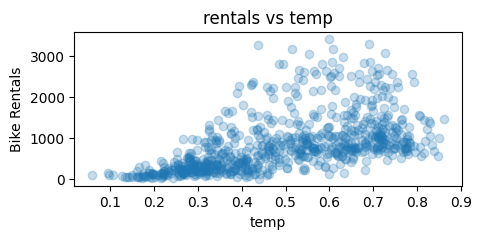

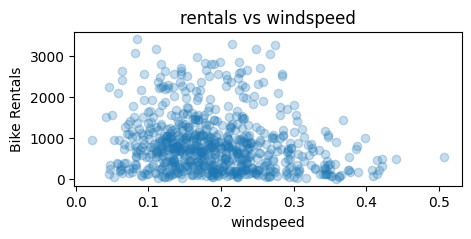

In [12]:
for i in numeric_features:
    fig = plt.figure(figsize=(5,2))
    plt.scatter(bike_data[i], bike_data[target], alpha=0.25)
    plt.xlabel(i)
    plt.ylabel('Bike Rentals')
    plt.title(f'rentals vs {i}')
    plt.show()

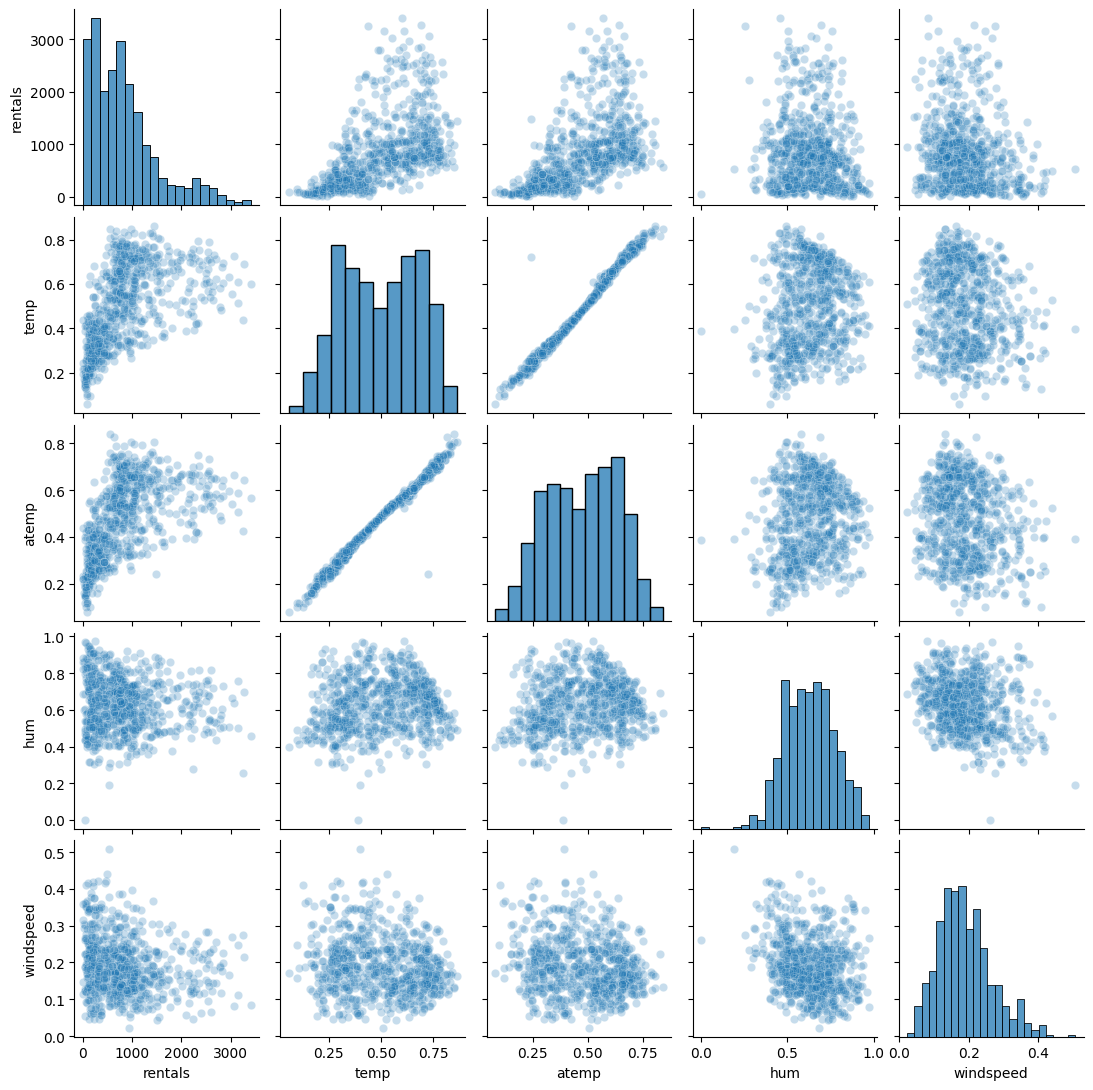

In [13]:
fig = sns.pairplot(bike_data[[target]+numeric_features], kind='scatter', plot_kws={'alpha': 0.25})
fig.fig.set_size_inches(11,11) # ustawiamy rozmiar wykresu
plt.show()

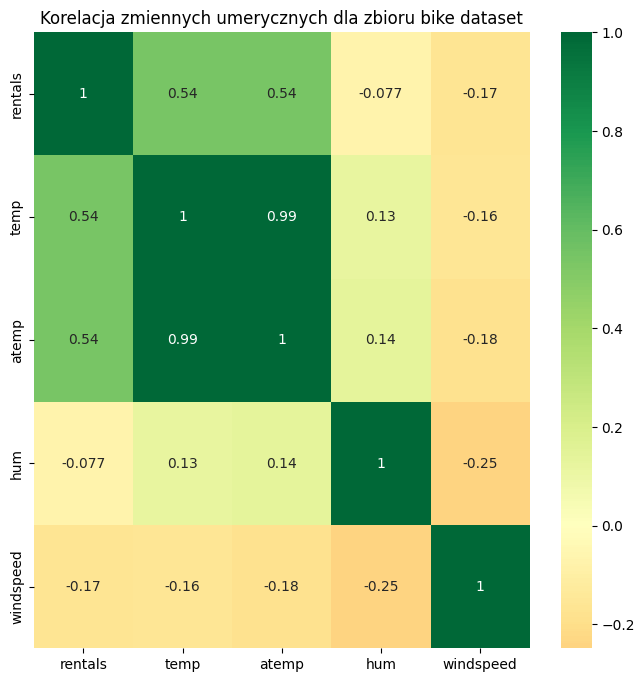

In [14]:
plt.figure(figsize=(8,8))
ax = sns.heatmap(bike_data[[target]+numeric_features].corr(), 
    xticklabels=bike_data[[target]+numeric_features].corr().columns, 
    yticklabels=bike_data[[target]+numeric_features].corr().columns, 
    cmap='RdYlGn', center=0, annot=True)
plt.title('Korelacja zmiennych umerycznych dla zbioru bike dataset', fontsize=12)
bottom, top = ax.get_ylim()
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [15]:
bike_data['difference_temp'] = (bike_data['atemp'] - bike_data['temp'])/bike_data['temp']
bike_data.drop(['atemp'], axis=1, inplace=True)
numeric_features = ['temp', 'difference_temp', 'hum', 'windspeed']
bike_data[['rentals', 'temp', 'difference_temp']].corr()

rentals      temp  difference_temp
rentals          1.000000  0.543285        -0.310423
temp             0.543285  1.000000        -0.599254
difference_temp -0.310423 -0.599254         1.000000

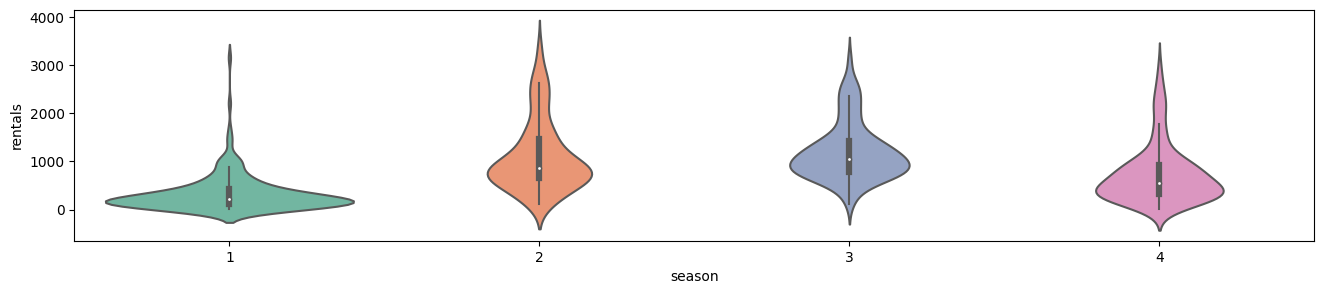

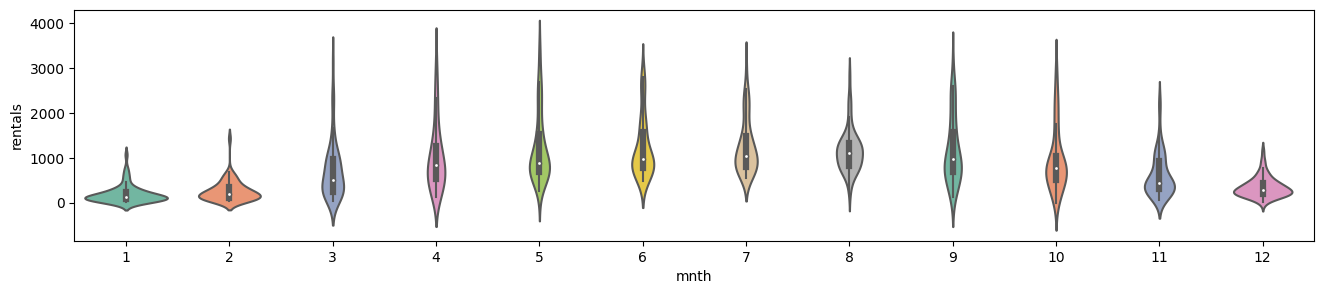

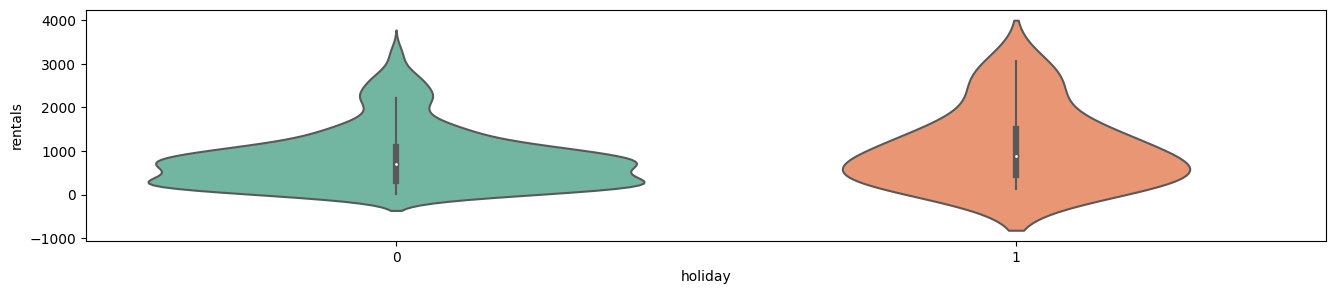

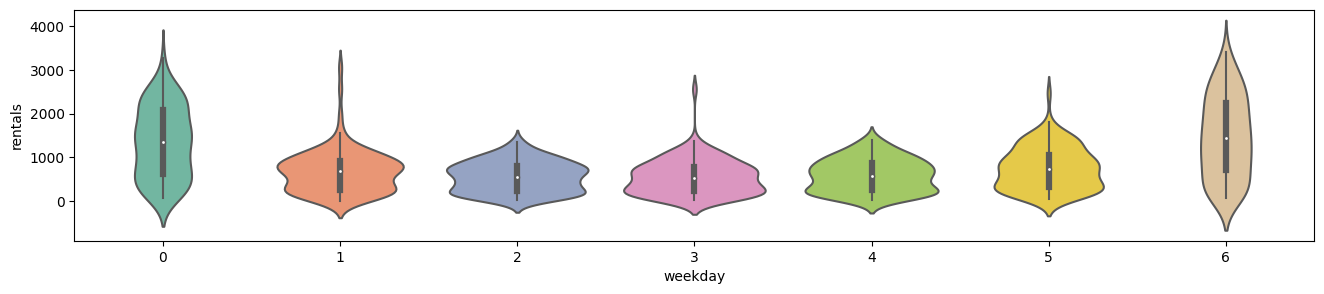

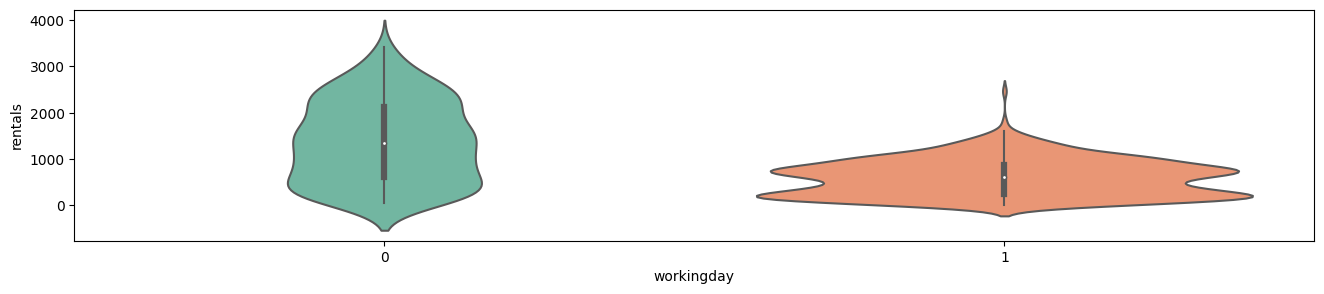

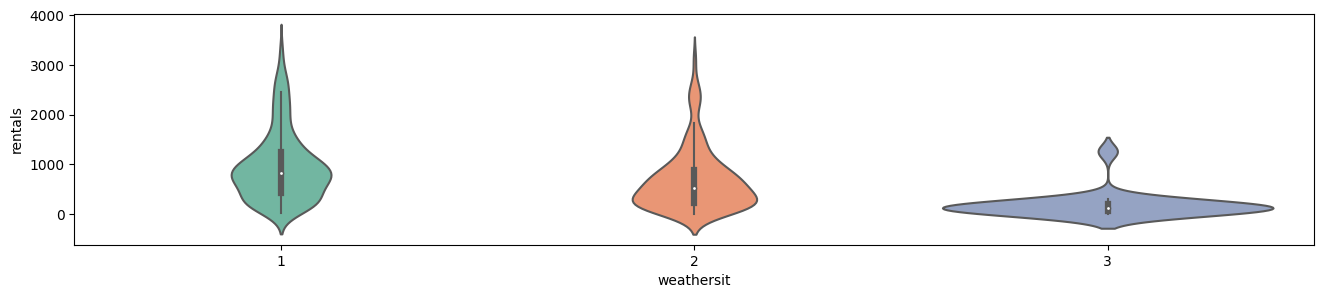

In [16]:
for categoric_features in categorical_features:
    plt.figure(figsize=(16, 3))
    sns.violinplot(y=bike_data[target], x=bike_data[categoric_features], palette='Set2')
    plt.show()

### Zadanie: wnioski
Spróbuj samodzielnie wyciągnąć wnioski z powyższych wykresów i podzielić się nimi z Mentorem. Wskaż np. w które miesiące wypożycza się więcej rowerów i zastanów się, dlaczego tak jest.
Wnioski zapisz w dokumencie tekstowym, np. w Google Docs i prześlij link swojemu Mentorowi.


Analizując wykresy skrzypcowe z wizualizacją rozkładu dla wypożyczeń rowerów można stwierdzić, że gdy jest cieplej, rowery są częściej wypożyczane. Latem i jesienią wypożycza się najwięcej rowerów. W lecie ta wartość osiąga nawet 4000 tysiące, powodem jest to, że wtedy jest bezchmurnie, lub lekka mgła, bądź chmury. W czasie deszczu i śniegu nie chętnie wypożyczane są rowery. 
Zauważyć można, że miesiące od kwietnia do września są największym sezonem rowerowym, aczkolwiek w sezonie zimowym również są wypożyczane, co może świadczyć o tym, że są tam rowery MTB lub wypożyczalnia znajduje się w jakimś ciepłym kraju, np. na Majorce, kraju rowerzystów, czego potwierdzeniem może być to, że żadne rowery nie są wypożyczane gdy jest ciężki deszcz/ogień/śnieg/mgła, które są charakterystyczne dla sezonu zimowego w środkowej europie i na północy.
Jak można się domyślać, w dni niepracujące, w czasie weekendów i świąt wypożyczeń rowerów jest więcej niż w trakcie tygodnia/dni pracujących. Najwięcej rowerów wypożyczanych jest właśnie w sobotę i niedzielę. 

# Regresja liniowa jednej zmiennej

In [17]:
print(f'Numeric features: {numeric_features}')
print(f'Categorical features: {categorical_features}')
print(f'Target: {target}')
display(bike_data)

Numeric features: ['temp', 'difference_temp', 'hum', 'windspeed']
Categorical features: ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
Target: rentals


season  mnth  holiday  weekday  workingday  weathersit      temp  \
0         1     1        0        6           0           2  0.344167   
1         1     1        0        0           0           2  0.363478   
2         1     1        0        1           1           1  0.196364   
3         1     1        0        2           1           1  0.200000   
4         1     1        0        3           1           1  0.226957   
..      ...   ...      ...      ...         ...         ...       ...   
726       1    12        0        4           1           2  0.254167   
727       1    12        0        5           1           2  0.253333   
728       1    12        0        6           0           2  0.253333   
729       1    12        0        0           0           1  0.255833   
730       1    12        0        1           1           2  0.215833   

          hum  windspeed  rentals  difference_temp  
0    0.805833   0.160446      331         0.056537  
1    0.696087   0.248539      131        -0.026794  
2    0.437273   0.248309      120        -0.035439  
3    0.590435   0.160296      108         0.060610  
4    0.436957   0.186900       82         0.010191  
..        ...        ...      ...              ...  
726  0.652917   0.350133      247        -0.108295  
727  0.590000   0.155471      644         0.006762  
728  0.752917   0.124383      159        -0.043157  
729  0.483333   0.350754      364        -0.094331  
730  0.577500   0.154846      439         0.035463  

[731 rows x 11 columns]

In [18]:
X = bike_data[['temp']].copy()
y = bike_data[target].copy()
print('X:')
print(X.values[:3])
print('\ny:')
print(y.values[:3])

X:
[[0.344167]
 [0.363478]
 [0.196364]]

y:
[331 131 120]


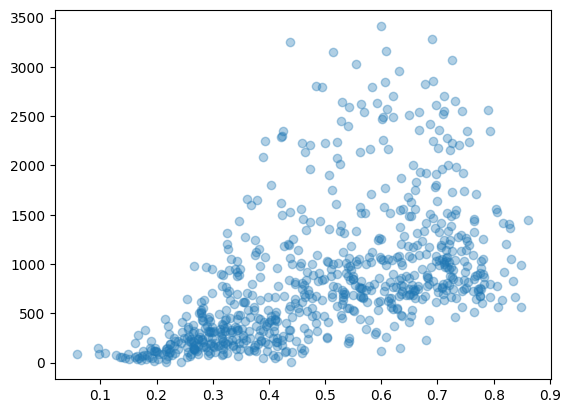

In [19]:
plt.scatter(X, y, alpha=0.35)
# m, b = np.polyfit(X,y,deg=1)
# plt.plot(x, m*X+b)
plt.show()

# Zbiór treningowy i testowy

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
print(f'X.shape: {X.shape}, y.shape: {y.shape}')
print()
print(f'X_train.shape: {X_train.shape}, y_train.shape: {y_train.shape}')
print(f'X_test.shape: {X_test.shape}, y_train.shape: {y_test.shape}')

X.shape: (731, 1), y.shape: (731,)

X_train.shape: (584, 1), y_train.shape: (584,)
X_test.shape: (147, 1), y_train.shape: (147,)


In [22]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression() # inicjalizacja modelu
lr_model.fit(X_train, y_train) # trenowanie modelu

LinearRegression()

In [23]:
print(lr_model.intercept_)
print(lr_model.coef_)

-179.96286312537404
[1990.31869846]


In [24]:
import numpy as np

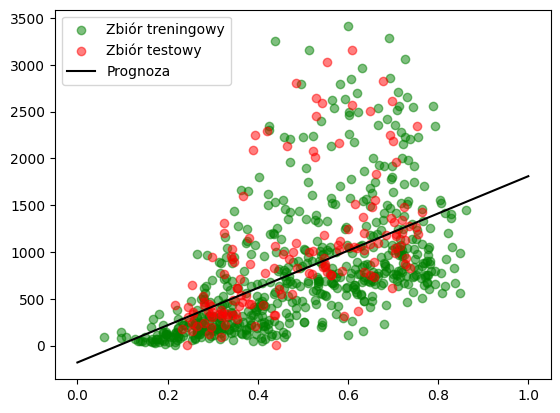

In [25]:
X_linspace = np.linspace(0,1,100)
y_fitted = lr_model.intercept_ + lr_model.coef_ * X_linspace

# Rysowanie wykresu
plt.scatter(X_train, y_train, color='green', alpha=0.5, label='Zbiór treningowy')
plt.scatter(X_test, y_test, color='red', alpha=0.5, label='Zbiór testowy')
plt.plot(X_linspace, y_fitted, color='black', label='Prognoza')
plt.legend(loc='upper left')
plt.show()

In [26]:
X_new = [[0.3],
         [0.7]]
predicted_data = lr_model.predict(X_new)
print(predicted_data)

[ 417.13274641 1213.2602258 ]


c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Ocena modelu

In [27]:
y_predict_train = lr_model.predict(X_train)
y_predict_test = lr_model.predict(X_test)

In [28]:
print('Predykcja:')
print(np.round(y_predict_test[:5].astype(int)))
print('Wartość prawdziwa:')
print(y_test.values[:5])

Predykcja:
[1284 1312 1324 1244 1198]
Wartość prawdziwa:
[1278 1263 1196 1065 2247]


### Współczynnik determinacji

In [29]:
from sklearn.metrics import r2_score
print(f'Train R^2: {r2_score(y_train, y_predict_train)}')

Train R^2: 0.30617863454631344


### MAE - Mean Absolute Error (Średni Błąd Absolutny)

In [30]:
from sklearn.metrics import mean_absolute_error
print(f'Train MAE: {mean_absolute_error(y_train, y_predict_train)}')
print(f'Test MAE: {mean_absolute_error(y_test,y_predict_test)}')


Train MAE: 404.8339599752615
Test MAE: 391.02879410802956


### Ćwiczenie
Zatem średnio nasz model myli się o liczbę 404 rowerów. Dużo? Odpowiedź uzasadnij i podziel się nią z Mentorem!

In [31]:
(bike_data['rentals'].sum())/bike_data['rentals'].count()

848.1764705882352

In [32]:
train=mean_absolute_error(y_train, y_predict_train)
(train/((bike_data['rentals'].sum())/bike_data['rentals'].count()))

0.4772992107344092

Średnio na dzień przypada 848 wypożyczonych rowerów, co oznacza, że nasz model myli się dziennie o połowę - to dużo, prawie 50%.

### MAPE - Mean Absolute Percentage Error (Średni Błąd Procentowy)

In [33]:
from sklearn.metrics import mean_absolute_percentage_error
print(f'Train MAPE: {mean_absolute_percentage_error(y_train, y_predict_train)}')
print(f'Test MAPE: {mean_absolute_percentage_error(y_test, y_predict_test)}')

Train MAPE: 0.9668581511778538
Test MAPE: 2.9864925318560496


In [34]:
# Średnio mylimy się prawie o 300%.

### MSE - Mean Squared Error (Średni Błąd Kwadratowy)

In [35]:
from sklearn.metrics import mean_squared_error
print(f'Train MSE: {mean_squared_error(y_train, y_predict_train)}')
print(f'Test MSE: {mean_squared_error(y_test, y_predict_test)}')

Train MSE: 317745.94124252343
Test MSE: 397066.9447179113


### RMSE - Root Mean Squared Error (Pierwiastek Błędu Średniokwadratowego)

In [36]:
from math import sqrt
print(f'Traim RMSE: {sqrt(mean_squared_error(y_train, y_predict_train))}')
print(f'Test RMSE: {sqrt(mean_squared_error(y_test, y_predict_test))}')

Traim RMSE: 563.6895787953894
Test RMSE: 630.1324818781454


# Wizualizacyjna ocena modelu

### Porównanie wartości prawdziwej z predykcją

In [37]:
plt.scatter(y_predict_test, y_test, alpha=0.25)
plt.xlabel('Prognoza')
plt.ylabel('Wartość prawdziwa')
plt.title('Wykres prognozy vs wartości prawdziwe', fontsize=12)
plt.plot(y_test, y_test, color="r", linestyle="--")
plt.show()


### Wykres reszt

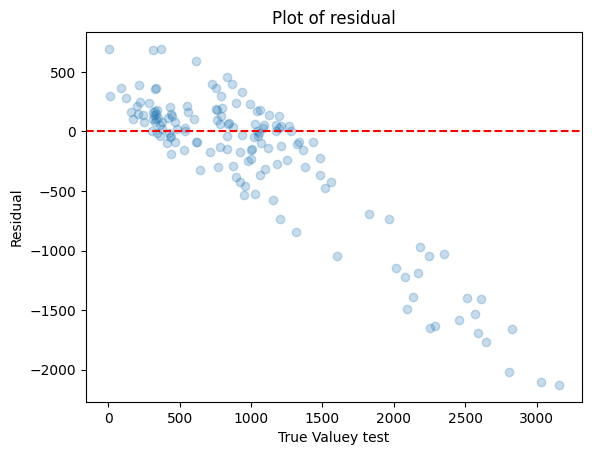

In [38]:
errors = y_predict_test - y_test
plt.scatter(x=y_test, y=errors, alpha=0.25)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('True Valuey test')
plt.ylabel('Residual')
plt.title(f'Plot of residual')
plt.show()

### Histogram reszt 

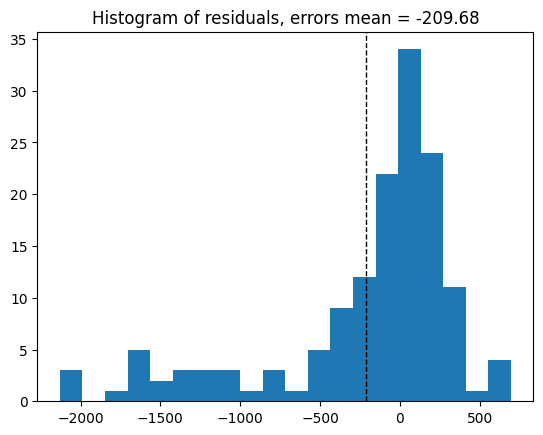

In [39]:
plt.hist(errors, bins=20)
plt.axvline(errors.mean(), color='k', linestyle='dashed', linewidth=1)
plt.title(f'Histogram of residuals, errors mean = {np.round(errors.mean(), 2)}')
plt.show()

# Regresja wielomianowa

In [40]:
from sklearn.preprocessing import PolynomialFeatures

In [41]:
# Tworzymy puste listy, gdzie umieszczone będą metryki oceniające
r_2_train_list = []
rmse_train_list = []
rmse_test_list = []

c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


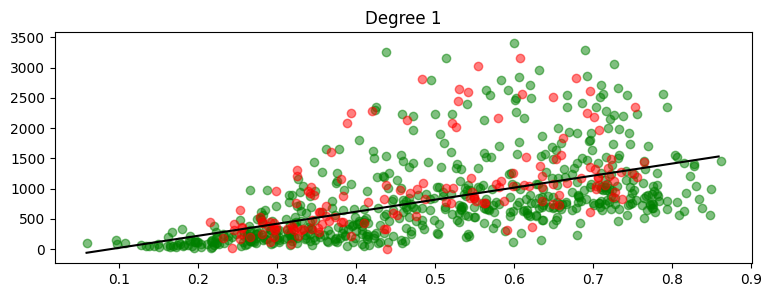

c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


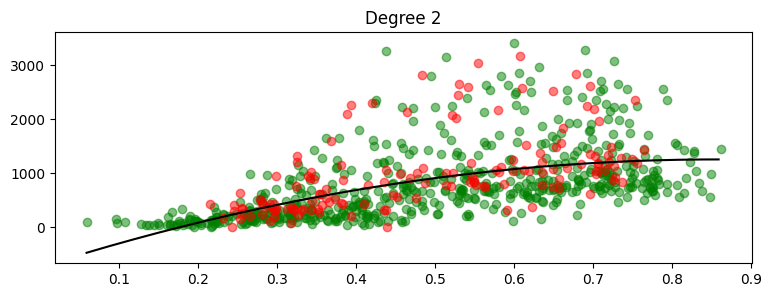

c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [42]:
# Tworzymy X, który zostanie wykorzystany dla wizualizacji naszego modelu
X_linespace=np.arange(X.min()[0], X.max()[0], step=0.005).reshape(-1,1)
for degree in [1,2,3,5,10,20]:
    
    # Transformacja naszego X
    poly_transformer = PolynomialFeatures(degree=degree)
    X_train_transformed = poly_transformer.fit_transform(X_train)
    
    # Trenowanie naszego modelu
    polynomial_regression = LinearRegression()
    polynomial_regression.fit(X_train_transformed, y_train)
    plt.figure(figsize=(9, 3))
    
    # Wizualizacja wartości ze zbioru treningowego oraz testowego
    plt.scatter(X_train, y_train, color='green', alpha=0.5, label='Zbiór treningowy')
    plt.scatter(X_test, y_test, color='red', alpha=0.5, label='Zbiór testowy')
    
    ########## Wizualizacja wielomianu ##########
    y_fitted = polynomial_regression.predict(poly_transformer.transform(X_linespace))
    plt.plot(X_linespace, y_fitted, color = 'black', label='Prognoza')
    plt.title(f'Degree {degree}')
    plt.show()
    
    # Predykcja modelu na zbiorze treningowym
    prediction_train = polynomial_regression.predict(X_train_transformed)
    
    # Predykcja modelu na zbiorze testowym - najpierw jednak należy przekształcić zbiór testowy
    X_test_transformed = poly_transformer.transform(X_test)
    prediction_test = polynomial_regression.predict(X_test_transformed)
    
    # Ocena modeli
    r_2_train_list.append(r2_score(y_train, prediction_train))
    rmse_train_list.append(sqrt(mean_squared_error(y_train, prediction_train)))
    rmse_test_list.append(sqrt(mean_squared_error(y_test, prediction_test)))


In [43]:
from matplotlib.ticker import MaxNLocator

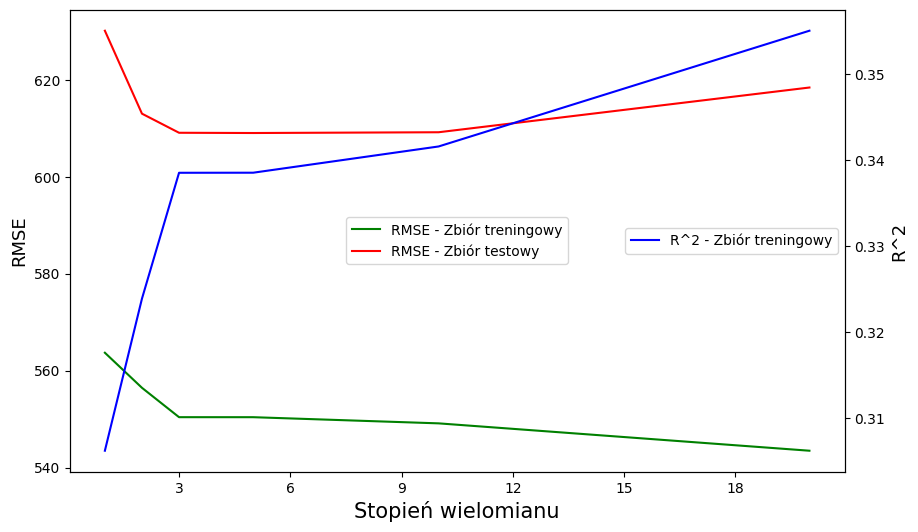

In [44]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()
ax.plot([1, 2, 3, 5, 10, 20], rmse_train_list, color='green', label='RMSE - Zbiór treningowy')
ax.plot([1, 2, 3, 5, 10, 20], rmse_test_list, color='red', label='RMSE - Zbiór testowy')
ax.legend(loc='center')
ax.xaxis.set_major_locator(MaxNLocator(integer=True)) # Ustawienie typu int dla wartości z osi X
ax.set_ylabel('RMSE', size=13)
ax.set_xlabel('Stopień wielomianu', size=15)

# Dodanie drugiej osi y dla R^2
ax2=ax.twinx()
ax2.plot([1, 2, 3, 5, 10, 20], r_2_train_list, color='blue', label='R^2 - Zbiór treningowy')
ax2.legend(loc='center right')
ax2.set_ylabel('R^2', size=13)

plt.show()


# Zbiór walidacyjny - sprawdzian krzyżowy

In [45]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, shuffle=False)

# Wybór hiperparametrów

In [46]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [47]:
# Tworzymy Pipeline - najpierw tworzymy wielomian, następnie uczymy model
polynomial_regression_pipeline = make_pipeline(PolynomialFeatures(), LinearRegression())

# Nasz model sprawdzi też hiperparametry
params = {'polynomialfeatures__degree': [1,2,3,4,5]}

# Inicjujemy Pipeline
polynomial_regression_gridsearch = GridSearchCV(polynomial_regression_pipeline, 
    params, scoring='neg_mean_squared_error', 
    # wybrane będą takie hiperparametry, które dadzą najmniejszą wartość dla tego scoringu
    cv=cv)

# Uczymy Grid Search, podajemy X_train - Pipline za nas zorbi wielomian :)
polynomial_regression_gridsearch.fit(X_train, y_train)
print('\nNajlepsze hiperparametry:', polynomial_regression_gridsearch.best_params_, '\n')

# Przekazujemy najlpszy estymator
polynomial_regression_model = polynomial_regression_gridsearch.best_estimator_
predictions = polynomial_regression_model.predict(X_test)
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}')


Najlepsze hiperparametry: {'polynomialfeatures__degree': 3} 

RMSE: 609.076780249834


# Regresja wielu zmiennych

In [48]:
# Podział na zmienne objaśniające i zmienną objaśnianą
X = bike_data[numeric_features].copy()
y = bike_data[target].copy()

# Podziała na zbiór terningowy i testowy (taki sam podział co poprzednio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Uczymy model
polynomial_regression_pipeline = make_pipeline(PolynomialFeatures(), LinearRegression())
params = {'polynomialfeatures__degree':[1,2,3,4,5]}
polynomial_regression_gridsearch = GridSearchCV(polynomial_regression_pipeline, 
params, scoring='neg_mean_squared_error', 
# Wybrane będą takie hiperparametry, które dadzą najmniejszą wartość dla tego scoringu
cv=cv)
polynomial_regression_gridsearch.fit(X_train, y_train)
print('\nNajlepsze hiperparametry:', polynomial_regression_gridsearch.best_params_, '\n')
polynomial_regression_model = polynomial_regression_gridsearch.best_estimator_
predictions = polynomial_regression_model.predict(X_test)
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}')



Najlepsze hiperparametry: {'polynomialfeatures__degree': 1} 

RMSE: 618.1519697010564


# Regularyzacja

### Lasso, Ridge, ElasticNet
•	Używamy Ridge, jeśli chcemy zmniejszyć ilość cech modelu.

•	Używamy Lasso albo ElasticNet, jeśli podejrzewamy, że tylko kilka cech jest przydatnych.

•	Preferujemy ElasticNet nad Lasso, gdyż Lasso jest wrażliwe na korelację między cechami oraz na dużą ilość cech.

•	Nie używamy LinearRegression, gdyż jest "do bani" :)


In [49]:
# Importujemy regresję liniową z regularyzacją Lasso i Ridge
from sklearn.linear_model import ElasticNet

In [50]:
# Uczymy model
polynomial_regression_pipeline = make_pipeline(PolynomialFeatures(), ElasticNet())
params = {'polynomialfeatures__degree': [1, 2, 3, 4, 5],
          'elasticnet__alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0],
          'elasticnet__l1_ratio': np.arange(0, 1.1, 0.1)}
polynomial_regression_gridsearch = GridSearchCV(polynomial_regression_pipeline,
        params,
        scoring='neg_mean_squared_error', 
        # wybrane będą takie hiperparametry które dadzą najmniejszą wartość dla tego scoringu
        cv=cv)
polynomial_regression_gridsearch.fit(X_train, y_train)
print("\nNajlepsze hiperparametry:", polynomial_regression_gridsearch.best_params_, "\n")
polynomial_regression_model = polynomial_regression_gridsearch.best_estimator_
predictions = polynomial_regression_model.predict(X_test)
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}')


c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.181e+07, tolerance: 2.207e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.663e+07, tolerance: 2.268e+04 Linear regression models with null weight for the l1 regularization term are more efficiently 


Najlepsze hiperparametry: {'elasticnet__alpha': 1.0, 'elasticnet__l1_ratio': 1.0, 'polynomialfeatures__degree': 5} 

RMSE: 584.8854667922697


# Wykorzystanie zmiennych kategorycznych

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

In [52]:
# Podział na zmienne objaśniające i zmienną objaśnianą
X = bike_data[numeric_features+categorical_features].copy()
y = bike_data[target].copy()

# Podział na zbiór treningowy i testowy (taki sam podział co poprzednio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
numeric_transformer = Pipeline(steps=[('logtransformer', PowerTransformer()), ('standardscaler', StandardScaler()), ('polynomialfeatures', PolynomialFeatures())])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer(
    transformers=[('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Tworzenie końcowego Pipeline, który będziemy trenować
final_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', ElasticNet())])
params = {'preprocessor__num__polynomialfeatures__degree': [1,2,3,4,5],
          'regressor__alpha':[1e-5,1e-4,1e-3,1e-2,1e-1,0.0,1.0,10.0, 100.0], 
          'regressor__l1_ratio': np.arange(0, 1.1, 0.1)}
final_polynomial_regression_gridsearch = GridSearchCV(final_pipeline, params, 
            scoring='neg_mean_squared_error', cv=cv)
final_polynomial_regression_gridsearch.fit(X_train, y_train)
print("\nNajlepsze hiperparametry:", final_polynomial_regression_gridsearch.best_params_, "\n")
final_polynomial_regression_model = final_polynomial_regression_gridsearch.best_estimator_
predictions = final_polynomial_regression_model.predict(X_test)
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}')


c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.169e+07, tolerance: 2.207e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.884e+07, tolerance: 2.268e+04 Linear regression models with null weight for the l1 regularization term are more efficiently 


Najlepsze hiperparametry: {'preprocessor__num__polynomialfeatures__degree': 1, 'regressor__alpha': 0.1, 'regressor__l1_ratio': 0.4} 

RMSE: 483.93794140501114


In [53]:
plt.scatter(predictions, y_test, alpha=0.25)
plt.xlabel('Prognoza')
plt.ylabel('Wartość prawdziwa')
plt.title('Wykres prognozy vs wartości prawdziwe', fontsize=12)
plt.plot(y_test, y_test, color="r", linestyle="--")
plt.show()

# Zadanie: pozostałe metryki
Policz pozostałe metryki dla tego modelu, zrób wizualizacyjną ocenę i następnie porównaj ostatni model z pierwszym, który stworzyliśmy.
Link do swojego Notebooka w GitHubie prześlij swojemu Mentorowi.


In [54]:
# Importujemy regresję liniową z regularyzacją Lasso
from sklearn.linear_model import Lasso

In [55]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

In [56]:
# Podział na zmienne objaśniające i zmienną objaśnianą
X = bike_data[numeric_features+categorical_features].copy()
y = bike_data[target].copy()

# Podział na zbiór treningowy i testowy (taki sam podział co poprzednio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
numeric_transformer = Pipeline(steps=[('logtransformer', PowerTransformer()), ('standardscaler', StandardScaler()), ('polynomialfeatures', PolynomialFeatures())])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer(
    transformers=[('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Tworzenie końcowego Pipeline, który będziemy trenować
final_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', Lasso())])
params = {'preprocessor__num__polynomialfeatures__degree': [1,2,3,4,5],
          'regressor__alpha':[1e-5,1e-4,1e-3,1e-2,1e-1,0.0,1.0,10.0, 100.0]}
final_polynomial_regression_gridsearch = GridSearchCV(final_pipeline, params, 
            scoring='neg_mean_squared_error', cv=cv)
final_polynomial_regression_gridsearch.fit(X_train, y_train)
print("\nNajlepsze hiperparametry:", final_polynomial_regression_gridsearch.best_params_, "\n")
final_polynomial_regression_model = final_polynomial_regression_gridsearch.best_estimator_
predictions = final_polynomial_regression_model.predict(X_test)
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}')

c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.566e+06, tolerance: 2.207e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.620e+06, tolerance: 2.268e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca


Najlepsze hiperparametry: {'preprocessor__num__polynomialfeatures__degree': 1, 'regressor__alpha': 10.0} 

RMSE: 506.8802692134751


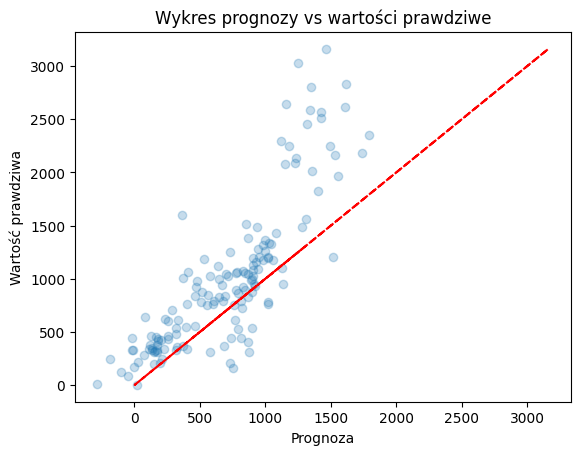

In [57]:
plt.scatter(predictions, y_test, alpha=0.25)
plt.xlabel('Prognoza')
plt.ylabel('Wartość prawdziwa')
plt.title('Wykres prognozy vs wartości prawdziwe', fontsize=12)
plt.plot(y_test, y_test, color="r", linestyle="--")
plt.show()

In [58]:
# Importujemy regresję liniową z regularyzacją Ridge
from sklearn.linear_model import Ridge

In [59]:
# Podział na zmienne objaśniające i zmienną objaśnianą
X = bike_data[numeric_features+categorical_features].copy()
y = bike_data[target].copy()

# Podział na zbiór treningowy i testowy (taki sam podział co poprzednio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
numeric_transformer = Pipeline(steps=[('logtransformer', PowerTransformer()), ('standardscaler', StandardScaler()), ('polynomialfeatures', PolynomialFeatures())])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer(
    transformers=[('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Tworzenie końcowego Pipeline, który będziemy trenować
final_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', Ridge())])
params = {'preprocessor__num__polynomialfeatures__degree': [1,2,3,4,5],
          'regressor__alpha':[1e-5,1e-4,1e-3,1e-2,1e-1,0.0,1.0,10.0, 100.0]}
final_polynomial_regression_gridsearch = GridSearchCV(final_pipeline, params, 
            scoring='neg_mean_squared_error', cv=cv)
final_polynomial_regression_gridsearch.fit(X_train, y_train)
print("\nNajlepsze hiperparametry:", final_polynomial_regression_gridsearch.best_params_, "\n")
final_polynomial_regression_model = final_polynomial_regression_gridsearch.best_estimator_
predictions = final_polynomial_regression_model.predict(X_test)
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}')


Najlepsze hiperparametry: {'preprocessor__num__polynomialfeatures__degree': 1, 'regressor__alpha': 10.0} 

RMSE: 473.16295909948184


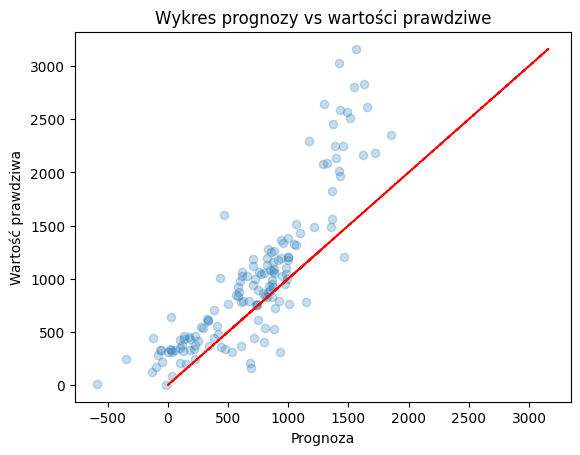

In [60]:
plt.scatter(predictions, y_test, alpha=0.25)
plt.xlabel('Prognoza')
plt.ylabel('Wartość prawdziwa')
plt.title('Wykres prognozy vs wartości prawdziwe', fontsize=12)
plt.plot(y_test, y_test, color="r", linestyle="--")
plt.show()

Najlepsze wyniki dla zbiorów walidacyjnych uzyskaliśmy dla wielomianu stopnia 1. 
W przypadku metryki Lasso tzw. regularyzacją L1, mniej znaczace cechy mają wewnętrzne wagi zmniejszone do zera, czyli W OGÓLE nie wpływają one na decyzyjność modelu. Natomiast wynik jest słabszy niż w przypadku ElasticNet, nasz model myli się więcej razy.
Metryka Ridge tzw. regularyzacją L2, wypadła najlepiej dla naszego zbioru. Podobnie jak Lasso, powoduje iż mniej znaczące cechy ulegają pomniejszeniu, lecz nie do zera, ale do wartości bliskiej zeru, czyli cecha ta posiada MINIMUM. Poprawiliśmy wynik w stosunku do metryki ElaskicNet i nasz model myli się już tylko 473 razy.